# GoBike Rent Demand on February 2019 in San Fransisco Bay Area based on User Demography, Location, and Time
## by Fletcher Sarip

## Investigation Overview

In this investigation, I wanted to look at how the bike demand varies based on user demography, location, and time. For the user demography, I will mainly focus on the user type, user gender, and user age, while for the location I will focus on the start station region, and for the time I will focus on the day of week and hour of day of the rent start time. The main reason I focus on "start" of the rent (instead of the "end" of the rent) is because it is the "start" location and time that influences the bike demand.

## Dataset Overview

The dataset contains the bike usage of Ford GoBike on February 2019 in San Fransisco Bay Area. The data consists of 183412 bike usage records in the dataset with 14 features, which are bike rent duration, start and end time, start and end station name and location, bike ID, user type, user birth year, and user gender. The user gender and user birth year columns may have null values, but it is acceptable since it is part of data privacy protection. The null values are kept there and will be ignored during the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [250]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/201902-fordgobike-tripdata-cleaned.csv',
                 parse_dates=['start_time', 'end_time'],
                 dtype={'start_station_id': 'str',
                        'end_station_id': 'str',
                        'bike_id': 'str',
                        'user_type': 'category',
                        'user_birth_year': 'Int16',
                        'user_gender': 'category',
                        'user_age': 'Int16',
                        'user_age_category': 'category',
                        'start_station_latitude_category': 'category',
                        'end_station_latitude_category': 'category',
                        'start_station_longitude_category': 'category',
                        'end_station_longitude_category': 'category',
                        'start_station_region': 'category',
                        'end_station_region': 'category'
                        })
df.duration = pd.to_timedelta(df.duration)

def to_str_with_k(n):
    if n >= 1000:
        y = (n/1000)
        return f'{y:.1f}k'
    else:
        return n

## Distribution of Bike Rent Duration

The bike rent duration has a large range of values, ranging from 61 seconds up to 23.75 hours. Plotted on logarithmic scale, the distribution of the duration takes on a slightly right-skewed normal distribution, centered at 515.95 seconds (8.6 minutes).

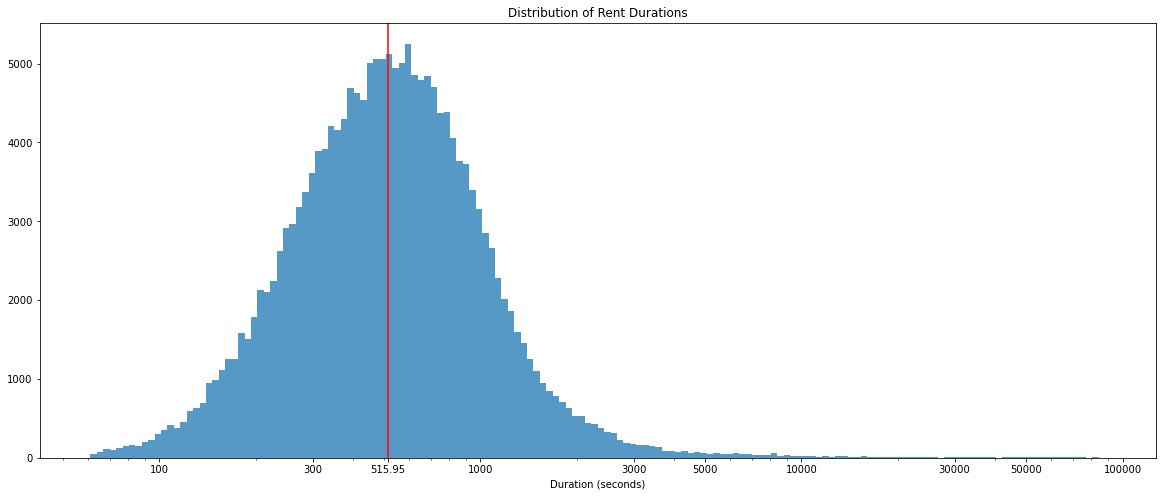

In [114]:
bins_log_size = 0.02
powers = np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max()) + bins_log_size, bins_log_size)
bins = 10 ** powers

plt.figure(figsize=(20,8))
sb.histplot(df.duration_sec, bins=bins)
# plt.ylim((0, 6000))
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xscale('log')
plt.xticks([100, 300, 515.95, 1000, 3000, 5000, 10000, 30000, 50000, 100000], [100, 300, 515.95, 1000, 3000, 5000, 10000, 30000, 50000, 100000]);
plt.axvline(515.95, color='red', label='log-mean')
plt.xlabel('Duration (seconds)')
plt.ylabel('')
plt.title('Distribution of Rent Durations');
# plt.legend();

## Distribution of Demand based on User Type

There are 2 types of users, which are subscribers and customers. Subscribers are users that have monthly subscription with GoBike, whereas customers are one-time users without monthly subscriptions. There are much more demands coming from subscribers than customers, where 89% of demands in February 2019 come from subscribers, as opposed to only 11% from customers.

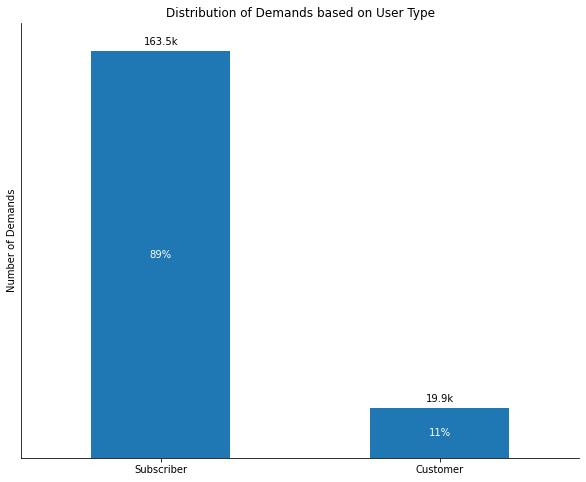

In [253]:
plt.figure(figsize=(10,8))
c = df.user_type.value_counts()
c.plot(kind='bar');
plt.xticks(rotation=0);
plt.ylabel('Number of Demands');
# plt.xlabel('User Type');
plt.title('Distribution of Demands based on User Type');
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.yticks([])
plt.ylim((0, 175000))
plt.text(0, c['Subscriber']+2500, to_str_with_k(c['Subscriber']), ha='center')
plt.text(1, c['Customer']+2500, to_str_with_k(c['Customer']), ha='center')
# plt.text(0, c['Subscriber']/2, '89%', color='w', ha='center', va='center')
# plt.text(1, c['Customer']/2, '11%', color='w', ha='center', va='center');
plt.text(0, c['Subscriber']/2, f'{c["Subscriber"]/c.sum()*100:.0f}%', color='w', ha='center', va='center')
plt.text(1, c['Customer']/2, f'{c["Customer"]/c.sum()*100:.0f}%', color='w', ha='center', va='center');

## Distribution of Demand based on User Age
The users age ranges from 18 to 92 years old. The demand based on user age has right-skewed distribution, showing that there are more demands from older users than from younger users, with most demands coming from users at age around 30 years old.

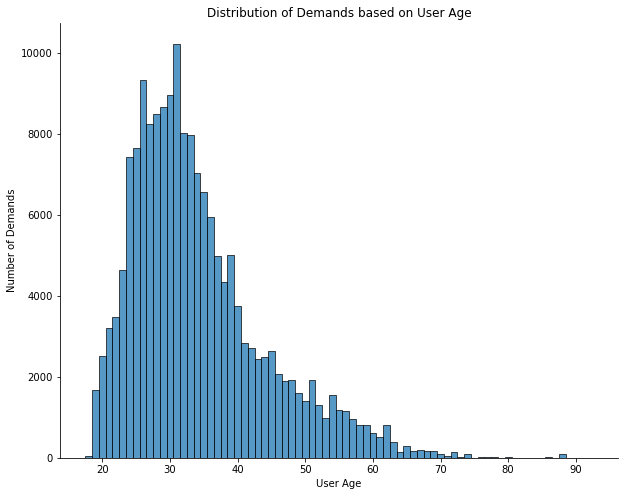

In [116]:
plt.figure(figsize=(10,8))
sb.histplot(df.user_age, discrete=True);
plt.title('Distribution of Demands based on User Age')
plt.xlabel('User Age');
plt.ylabel('Number of Demands')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

## Distribution of Demand based on User Gender
The user gender is divided into Female, Male, Other, and Not Given. Most demands come from male users (71%), followed by female users (22%), not given gender (5%), and lastly the other gender (2%) being the lowest.

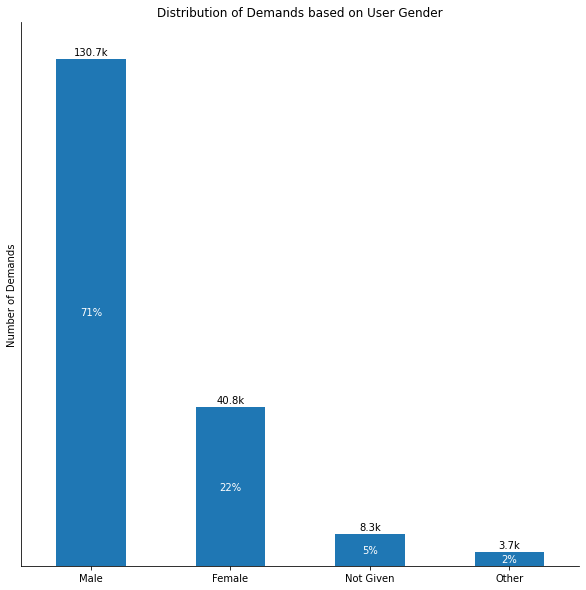

In [252]:
plt.figure(figsize=(10,10))
c = df.user_gender.value_counts()
c.plot(kind='bar', rot=0);
plt.ylabel('Number of Demands');
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(0, c['Male']+1000, to_str_with_k(c['Male']), ha='center')
plt.text(1, c['Female']+1000, to_str_with_k(c['Female']), ha='center')
plt.text(2, c['Not Given']+1000, to_str_with_k(c['Not Given']), ha='center')
plt.text(3, c['Other']+1000, to_str_with_k(c['Other']), ha='center');
plt.ylim((0, 140000))
plt.title('Distribution of Demands based on User Gender');
plt.text(0, c['Male']/2, f'{c["Male"]/c.sum()*100:.0f}%', color='w', ha='center', va='center')
plt.text(1, c['Female']/2, f'{c["Female"]/c.sum()*100:.0f}%', color='w', ha='center', va='center')
plt.text(2, c['Not Given']/2, f'{c["Not Given"]/c.sum()*100:.0f}%', color='w', ha='center', va='center')
plt.text(3, c['Other']/2, f'{c["Other"]/c.sum()*100:.0f}%', color='w', ha='center', va='center');

## Station Location Clusters
Based on the distribution of demand over the station locations, the stations can be clustered into 4 regions: NorthWest, NorthMiddle, MiddleEast, and SouthEast region.

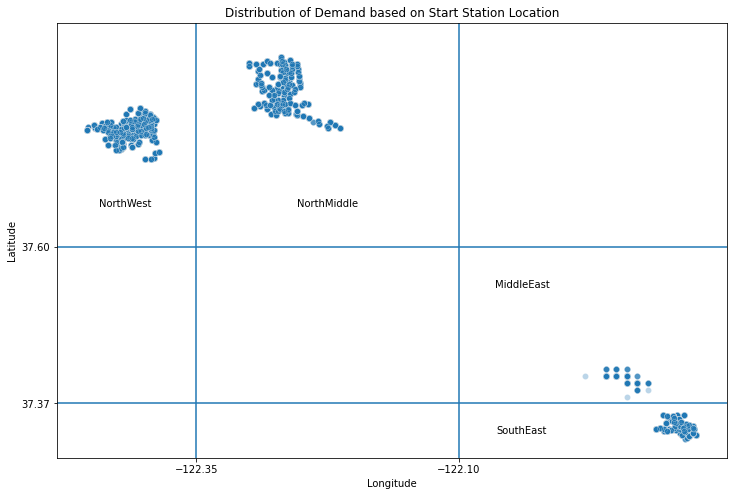

In [242]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='start_station_longitude', y='start_station_latitude', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim((37.29, 37.93))
plt.yticks([37.37, 37.6]);
plt.xticks([-122.35, -122.1]);
plt.axhline(37.37)
plt.axhline(37.6)
plt.axvline(-122.35)
plt.axvline(-122.1);
plt.title('Distribution of Demand based on Start Station Location');
plt.text(-122.418, 37.66, 'NorthWest', ha='center')
plt.text(-122.225, 37.66, 'NorthMiddle', ha='center')
plt.text(-122.04, 37.54, 'MiddleEast', ha='center')
plt.text(-122.04, 37.325, 'SouthEast', ha='center');

## Distribution of Demand based on Start Station Region
Most demands come from NorthWest region (72.9%), followed by NorthMiddle region (23%), SouthEast region (4%), and lastly MiddleEast region being the lowest (0.1%).

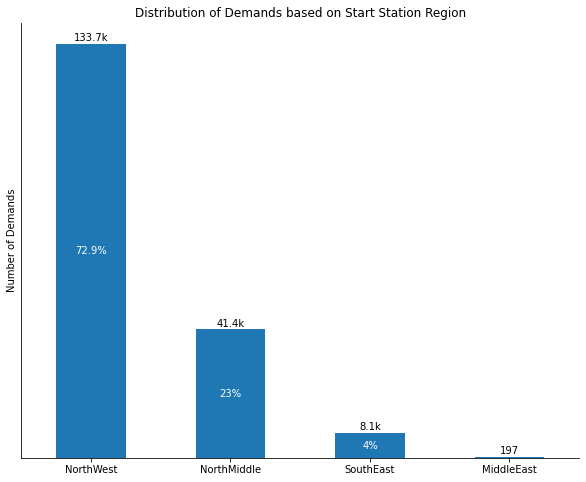

In [257]:
plt.figure(figsize=(10,8))
c = df.start_station_region.value_counts()
c.plot(kind='bar', rot=0)

plt.ylabel('Number of Demands');
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(0, c['NorthWest']+1000, to_str_with_k(c['NorthWest']), ha='center')
plt.text(1, c['NorthMiddle']+1000, to_str_with_k(c['NorthMiddle']), ha='center')
plt.text(2, c['SouthEast']+1000, to_str_with_k(c['SouthEast']), ha='center')
plt.text(3, c['MiddleEast']+1000, to_str_with_k(c['MiddleEast']), ha='center');
# plt.ylim((0, 140000))
plt.title('Distribution of Demands based on Start Station Region');
plt.text(0, c['NorthWest']/2, f'{c["NorthWest"]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(1, c['NorthMiddle']/2, f'{c["NorthMiddle"]/c.sum()*100:.0f}%', color='w', ha='center', va='center')
plt.text(2, c['SouthEast']/2, f'{c["SouthEast"]/c.sum()*100:.0f}%', color='w', ha='center', va='center');

## Distribution of Demand over the Days of Week
The demands are higher during the weekdays than during the weekends.

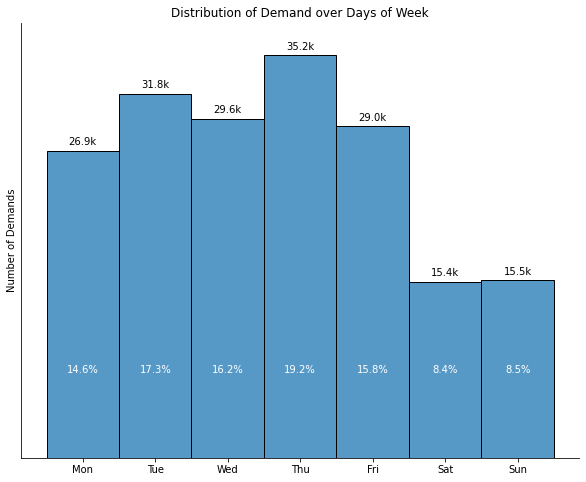

In [281]:
plt.figure(figsize=(10,8))
sb.histplot(df.start_time.dt.dayofweek, discrete=True,)
plt.xlabel('');
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat', 'Sun']);
plt.title('Distribution of Demand over Days of Week');

c = df.groupby(df.start_time.dt.dayofweek).start_time.count()
plt.ylabel('Number of Demands');
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
offset = 500
plt.text(0, c[0]+offset, to_str_with_k(c[0]), ha='center')
plt.text(1, c[1]+offset, to_str_with_k(c[1]), ha='center')
plt.text(2, c[2]+offset, to_str_with_k(c[2]), ha='center')
plt.text(3, c[3]+offset, to_str_with_k(c[3]), ha='center')
plt.text(4, c[4]+offset, to_str_with_k(c[4]), ha='center')
plt.text(5, c[5]+offset, to_str_with_k(c[5]), ha='center')
plt.text(6, c[6]+offset, to_str_with_k(c[6]), ha='center')

plt.text(0, c[5]/2, f'{c[0]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(1, c[5]/2, f'{c[1]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(2, c[5]/2, f'{c[2]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(3, c[5]/2, f'{c[3]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(4, c[5]/2, f'{c[4]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(5, c[5]/2, f'{c[5]/c.sum()*100:.1f}%', color='w', ha='center', va='center')
plt.text(6, c[5]/2, f'{c[6]/c.sum()*100:.1f}%', color='w', ha='center', va='center');
plt.ylim((0, 38000));

## Distribution of Demand over the Hour of Day
There are 2 peak demand hours within each day, one from 08:00 to 09:00, and another from 17:00 to 18:00.

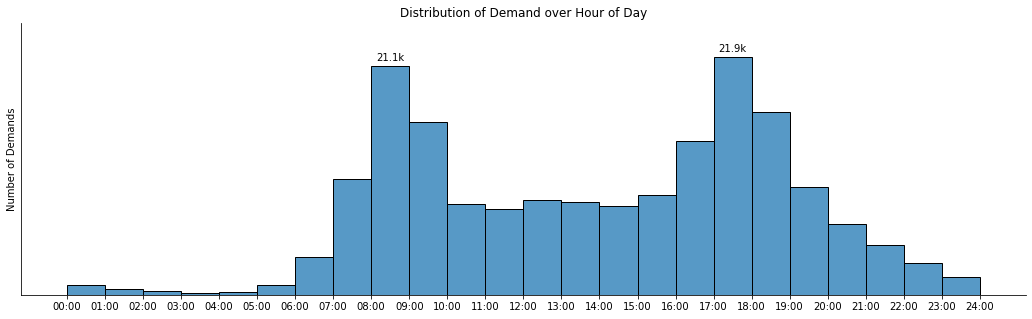

In [306]:
plt.figure(figsize=(18,5))
sb.histplot(df.start_time.dt.hour, discrete=True)
plt.xlabel('');
ticks = np.arange(0, 25, 1)
plt.xticks(ticks-0.5, [x.zfill(2)+':00' for x in ticks.astype(str)]);
plt.title('Distribution of Demand over Hour of Day');

c = df.groupby(df.start_time.dt.hour).start_time.count()
plt.ylabel('Number of Demands');
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
offset = 500
plt.text(8, c[8]+offset, to_str_with_k(c[8]), ha='center')
plt.text(17, c[17]+offset, to_str_with_k(c[17]), ha='center')
plt.ylim((0, 25000));

## Distribution of Rent Duration based on User Type
There are 2 peak demand hours within each day, one from 08:00 to 09:00, and another from 17:00 to 18:00.

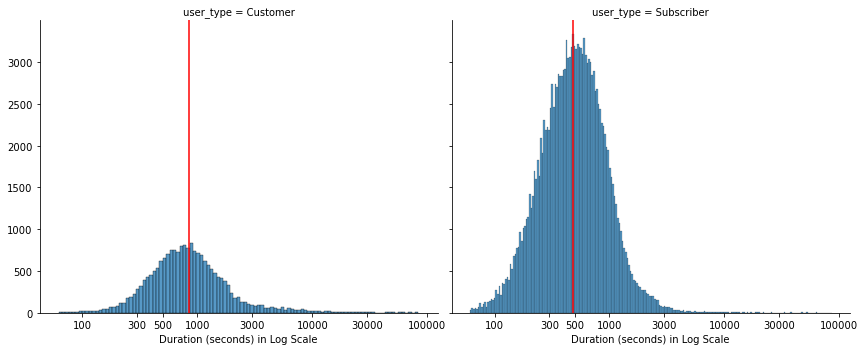

In [308]:
g = sb.FacetGrid(data=df, col='user_type', height=5, aspect=1.2)
g.map(sb.histplot, 'duration_sec_log');
g.set_xlabels('Duration (seconds) in Log Scale');

xticks_labels = [100, 300, 500, 1000, 3000, 10000, 30000, 100000]
xticks = np.log10(xticks_labels)
for ax in g.axes.squeeze():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    if 'Customer' in ax.title.get_text():
        ax.axvline(df.query('user_type == "Customer"').duration_sec_log.mean(), color='red', label='Log-Mean')
    else:
        ax.axvline(df.query('user_type == "Subscriber"').duration_sec_log.mean(), color='red', label='Log-Mean')
        
# plt.legend();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!